In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('../bagging/car_sensors.csv')
df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,1,57,0.0,0.280,240,5.99375,0,0.0,4,14.9382
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,1,57,0.0,0.175,240,5.99375,0,0.0,4,14.8827
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,1,58,0.0,0.280,240,5.99375,0,0.0,4,14.6005
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,1,58,0.0,0.385,240,4.50625,0,13.0,4,14.6782
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,1,57,0.0,0.070,240,5.99375,0,19.5,4,15.3461


In [3]:
df.columns

Index(['safe', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22'],
      dtype='object')

In [4]:
df.shape

(33239, 23)

In [5]:
df['weights'] = 1 / df.shape[0] # initial weights of each sample



In [6]:
df.head(6)

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S14,S15,S16,S17,S18,S19,S20,S21,S22,weights
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,57,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.00003
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,57,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.00003
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,58,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.00003
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,58,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.00003
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,57,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.00003
5,1,36.1261,14.85930,0.278925,600,100.0000,0.0,0.0,1,4,...,58,0.0,0.175,1008,4.50625,0,23.9,4,15.0559,0.00003


In [7]:
X = df.drop('safe', axis=1)
y = df['safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# train a weak classifier
dt1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1, random_state=42)

[Text(0.5, 0.75, 'x[12] <= 0.5\ngini = 0.489\nsamples = 33239\nvalue = [14100, 19139]'),
 Text(0.25, 0.25, 'gini = 0.141\nsamples = 4035\nvalue = [3728, 307]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.458\nsamples = 29204\nvalue = [10372, 18832]'),
 Text(0.625, 0.5, '  False')]

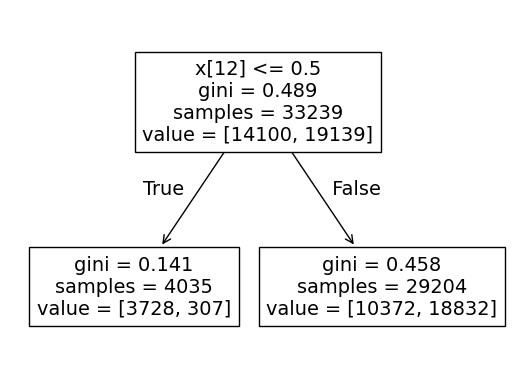

In [9]:
from sklearn.tree import plot_tree

plot_tree(dt1)

In [10]:
df['y_pred'] = dt1.predict(X)
df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.00003,1
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.00003,1
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.00003,1
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.00003,1
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.00003,1


In [11]:
error_factor = np.where(df['y_pred'] != df['safe'], df['weights'], 0)
e_m = error_factor.sum() / df['weights'].sum()

accuracy_factor = np.log((1 - df['e_m']) / df['e_m'])

KeyError: 'e_m'

In [ ]:
#update weights
def update_weights(df, accuracy_factor):
    if df['safe'] == df['y_pred']:
        return df['weights'] * np.exp(-accuracy_factor)
    else:
        return df['weights'] * np.exp(accuracy_factor)

In [ ]:
df['weights'] = df.apply(lambda row: update_weights(row, accuracy_factor), axis=1)

df['weights'] = df['weights'] / df['weights'].sum()